In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

### Data cleaning

In [4]:
rawDf = pd.read_csv("datasets/2016_Election_2010_Religion.csv")
rawDf.head()

,State Code,County Name,County Population,Clinton or Trump State,Clinton,Trump,Total,% Clinton,% Trump,Vote Difference C-T,...,Total Hindu Adherents,Total Hindus Adherents per Thousand,Muslims Estimated,Muslims Estimated per Thousand,Total Judaism Adherents,Total Judaism Adherents per Thousand,Unitarian Universalist Adherents,Unitarian Universalist Adherents per Thousand,Zoroastrian Adherents,Zoroastrian Adherents per Thousand
0,AL,Autauga County,"55,347",Trump,"5,908","18,110","24,661",23.96%,73.44%,"(12,202)",...,-,0.0,NaN,NaN,-,0.0,NaN,NaN,3.0,0.05
1,AL,Baldwin County,"203,709",Trump,"18,409","72,780","94,090",19.57%,77.35%,"(54,371)",...,-,0.0,NaN,NaN,-,0.0,146,0.8,NaN,NaN
2,AL,Barbour County,"26,489",Trump,"4,848","5,431","10,390",46.66%,52.27%,(583),...,-,0.0,NaN,NaN,-,0.0,NaN,NaN,NaN,NaN
3,AL,Bibb County,"22,583",Trump,"1,874","6,733","8,748",21.42%,76.97%,"(4,859)",...,-,0.0,NaN,NaN,-,0.0,NaN,NaN,NaN,NaN
4,AL,Blount County,"57,673",Trump,"2,150","22,808","25,384",8.47%,89.85%,"(20,658)",...,-,0.0,NaN,NaN,-,0.0,NaN,NaN,NaN,NaN


In [5]:
rawDf.size

152537

In [6]:
# Remove space from the beginning and end of a string 
rawDf.columns = rawDf.columns.str.strip()

# Drop unwanted columns
dropCols = ["% Clinton", "% Trump", "Vote Difference T-C", "Percent Difference C-T", "Percent Difference T-C",
            "% Difference O-R", "County Name", "Clinton or Trump State", "% Obama", "% Romney", "% Difference O-R"]
rawDf.drop(dropCols, axis=1, inplace=True)

rawDf = rawDf[rawDf.columns.drop(list(rawDf.filter(regex='per Thousand')))]
rawDf = rawDf[rawDf.columns.drop(list(rawDf.filter(regex='per  Thousand')))]

# Remove parentheses
rawDf['Vote Difference C-T'] = rawDf['Vote Difference C-T'].str.replace(r"\(","").str.replace(r"\)","")
rawDf['Vote Difference O-R'] = rawDf['Vote Difference O-R'].str.replace(r"\(","").str.replace(r"\)","")

# Remove commas from numbers
rawDf.replace(',','', regex=True, inplace=True)

# Replace NaN values with 0
rawDf.fillna(0, inplace=True)
rawDf.head()

,State Code,County Population,Clinton,Trump,Total,Vote Difference C-T,Obama,Romney,2012 Total Votes,Vote Difference O-R,...,Catholic Adherents,Orthodox Adherents,Baha'I Adherents,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents
0,AL,55347,5908,18110,24661,12202,6354,17366,23909,11012,...,1766,0,33,-,820,-,0,-,0,3.0
1,AL,203709,18409,72780,94090,54371,18329,65772,84988,47443,...,14009,190,37,-,1022,-,0,-,146,0.0
2,AL,26489,4848,5431,10390,583,5873,5539,11459,334,...,575,0,0,-,265,-,0,-,0,0.0
3,AL,22583,1874,6733,8748,4859,2200,6131,8391,3931,...,0,0,3,-,0,-,0,-,0,0.0
4,AL,57673,2150,22808,25384,20658,2961,20741,23980,17780,...,4744,0,1,-,291,-,0,-,0,0.0


In [7]:
# Clean, replace and convert columns
cols_to_clean = rawDf.columns[1:]

for col in cols_to_clean:
    if rawDf[col].dtype == 'object':
        rawDf[col] = rawDf[col].str.replace(' -   ','0')
        rawDf[col] = rawDf[col].fillna(0)
        rawDf[col] = rawDf[col].astype(str).astype(int)
    
rawDf.head()

,State Code,County Population,Clinton,Trump,Total,Vote Difference C-T,Obama,Romney,2012 Total Votes,Vote Difference O-R,...,Catholic Adherents,Orthodox Adherents,Baha'I Adherents,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents
0,AL,55347,5908,18110,24661,12202,6354,17366,23909,11012,...,1766,0,33,0,820,0,0,0,0,3.0
1,AL,203709,18409,72780,94090,54371,18329,65772,84988,47443,...,14009,190,37,0,1022,0,0,0,146,0.0
2,AL,26489,4848,5431,10390,583,5873,5539,11459,334,...,575,0,0,0,265,0,0,0,0,0.0
3,AL,22583,1874,6733,8748,4859,2200,6131,8391,3931,...,0,0,3,0,0,0,0,0,0,0.0
4,AL,57673,2150,22808,25384,20658,2961,20741,23980,17780,...,4744,0,1,0,291,0,0,0,0,0.0


In [8]:
# Group new dataframe in states
cols = rawDf.columns[1:]
groupedDf = rawDf.groupby("State Code")[cols].sum()

# Rename county to state pop
groupedDf.rename(columns={'County Population': 'State Pop', 'Vote Difference C-T':'Vote Difference', 'Total':'Total Votes'}, inplace=True)

groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Catholic Adherents,Orthodox Adherents,Baha'I Adherents,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0,0,0,0,0,0,0,0,0,0.0
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,200657,3001,1441,1384,34349,1379,10258,7300,1079,15.0
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,122662,1200,1266,1956,27559,2520,3746,1547,710,0.0
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,930702,16233,7659,19261,392918,32887,8557,20404,2606,134.0
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,10234036,154331,29638,326940,763818,112132,272814,215404,15760,1837.0


In [9]:
# Get the percentage of believers per state
groupedDf["Believer Ratio"] = groupedDf["Total Adherents"]/groupedDf["State Pop"]
groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Orthodox Adherents,Baha'I Adherents,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents,Believer Ratio
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,3001,1441,1384,34349,1379,10258,7300,1079,15.0,0.618968
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,1200,1266,1956,27559,2520,3746,1547,710,0.0,0.542057
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,16233,7659,19261,392918,32887,8557,20404,2606,134.0,0.348551
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,154331,29638,326940,763818,112132,272814,215404,15760,1837.0,0.428301


In [10]:
# Get estimate believers per thousand
groupedDf["Believers per Thousand"] = groupedDf["Total Adherents"] / (groupedDf["State Pop"] / 1000)

In [11]:
groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Baha'I Adherents,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents,Believer Ratio,Believers per Thousand
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0,0,0,0,0,0,0,0.0,0.000000,0.000000
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,1441,1384,34349,1379,10258,7300,1079,15.0,0.618968,618.968100
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,1266,1956,27559,2520,3746,1547,710,0.0,0.542057,542.057226
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,7659,19261,392918,32887,8557,20404,2606,134.0,0.348551,348.550871
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,29638,326940,763818,112132,272814,215404,15760,1837.0,0.428301,428.300650


In [12]:
# Get the percentage of voters
groupedDf["Voters Ratio"] = groupedDf["Total Votes"] / groupedDf["State Pop"]
groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Total Buddhist Adherents,Latter Day Saints Adherents,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents,Believer Ratio,Believers per Thousand,Voters Ratio
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.333935
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,1384,34349,1379,10258,7300,1079,15.0,0.618968,618.968100,0.427696
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,1956,27559,2520,3746,1547,710,0.0,0.542057,542.057226,0.372243
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,19261,392918,32887,8557,20404,2606,134.0,0.348551,348.550871,0.302108
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,326940,763818,112132,272814,215404,15760,1837.0,0.428301,428.300650,0.299747


In [13]:
groupedDf["Total Unbelievers"] = groupedDf["State Pop"] - groupedDf["Total Adherents"]
groupedDf["Total Unbelievers"].unique()

array([  738432,  1851426,  1363847,  4448137, 22379067,  3554292,
        1760024,   339886,   571017, 12913684,  5290484,   869537,
        1481555,   853275,  5765163,  3745536,  1467186,  2187378,
        1923827,  3046364,  3591025,   962285,  5757233,  2503144,
        3132778,  1249417,   655973,  5512437,   305471,   879661,
         867836,  4148493,  1053911,  1962890,  9872279,  6541739,
        1684959,  2834184,  5964063,   479379,  2482703,   367264,
        3077954, 13474550,   809516,  4801229,   415651,  4842346,
        2723895,  1185815,   363033])

In [14]:
groupedDf["Voters Ratio"].nsmallest(5)

State Code
HI    0.299560
CA    0.299747
AZ    0.302108
TX    0.324118
UT    0.328766
Name: Voters Ratio, dtype: float64

In [15]:
# Add a column for the 2016 winner 
groupedDf['Winner 2016'] = np.where(groupedDf['Clinton']>groupedDf['Trump'], 'Clinton', 'Trump')
groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Total Hindu Adherents,Muslims Estimated,Total Judaism Adherents,Unitarian Universalist Adherents,Zoroastrian Adherents,Believer Ratio,Believers per Thousand,Voters Ratio,Total Unbelievers,Winner 2016
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0,0,0,0,0.0,0.000000,0.000000,0.333935,738432,Trump
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,1379,10258,7300,1079,15.0,0.618968,618.968100,0.427696,1851426,Trump
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,2520,3746,1547,710,0.0,0.542057,542.057226,0.372243,1363847,Trump
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,32887,8557,20404,2606,134.0,0.348551,348.550871,0.302108,4448137,Trump
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,112132,272814,215404,15760,1837.0,0.428301,428.300650,0.299747,22379067,Clinton


In [16]:
groupedDf.columns

Index(['State Pop', 'Clinton', 'Trump', 'Total Votes', 'Vote Difference',
       'Obama', 'Romney', '2012 Total Votes', 'Vote Difference O-R',
       'CBSA Population', 'POP2010', 'Total Congregations', 'Total Adherents',
       'Evangelical Protestant Adherents',
       'Evangelical Protestants Per Thousand', 'Black Protestant Adherents',
       'Catholic Adherents', 'Orthodox Adherents', 'Baha'I Adherents',
       'Total Buddhist Adherents', 'Latter Day Saints Adherents',
       'Total Hindu Adherents', 'Muslims Estimated', 'Total Judaism Adherents',
       'Unitarian Universalist Adherents', 'Zoroastrian Adherents',
       'Believer Ratio', 'Believers per Thousand', 'Voters Ratio',
       'Total Unbelievers', 'Winner 2016'],
      dtype='object')

In [17]:
groupedDf.shape

(51, 31)

In [18]:
groupedDf[["Clinton", "Trump"]].sum()

Clinton    62391335
Trump      61125956
dtype: int64

In [19]:
res = groupedDf["Catholic Adherents"]/groupedDf["State Pop"] * 1000
most_catholic_states = res.nlargest(5)
least_catholic_states = res.nsmallest(6)[1:] # ignore AK which has 0
print(most_catholic_states)

State Code
RI    441.729512
MA    432.737178
NJ    361.161566
CT    349.312120
NY    317.623984
dtype: float64


In [20]:
cols = ['Black Protestant Adherents','Catholic Adherents', 'Orthodox Adherents','Baha\'I Adherents', 'Total Buddhist Adherents', 
        'Latter Day Saints Adherents', 'Total Hindu Adherents', 'Muslims Estimated', 'Total Judaism Adherents',
       'Unitarian Universalist Adherents', 'Zoroastrian Adherents']

cols_thousand = []

for col in cols:
        colName = col + ' per thousand'
        groupedDf[colName] = groupedDf[col]/groupedDf["State Pop"] * 1000
        cols_thousand.append(colName)
        
groupedDf.head()

,State Pop,Clinton,Trump,Total Votes,Vote Difference,Obama,Romney,2012 Total Votes,Vote Difference O-R,CBSA Population,...,Catholic Adherents per thousand,Orthodox Adherents per thousand,Baha'I Adherents per thousand,Total Buddhist Adherents per thousand,Latter Day Saints Adherents per thousand,Total Hindu Adherents per thousand,Muslims Estimated per thousand,Total Judaism Adherents per thousand,Unitarian Universalist Adherents per thousand,Zoroastrian Adherents per thousand
State Code,,,,,,,,,,,,,,,,,,,,,
AK,738432,93007,130415,246588,37408,122640,164676,300495,42036,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL,4858979,718084,1306925,2078165,744447,793620,1252453,2064699,629365,13476221,...,41.296124,0.617619,0.296564,0.284834,7.069181,0.283804,2.111143,1.502373,0.222063,0.003087
AR,2978204,378729,677904,1108615,379649,391953,643717,1062831,322680,8769549,...,41.186567,0.402927,0.425088,0.656772,9.253564,0.846148,1.257805,0.519441,0.238399,0.000000
AZ,6828065,936250,1021154,2062810,227464,900081,1107130,2041519,289803,11055878,...,136.305381,2.377394,1.121694,2.820858,57.544561,4.816445,1.253210,2.988255,0.381660,0.019625
CA,39144818,7230699,3841134,11733523,3726917,6241648,4046524,10538656,2699994,83737384,...,261.440378,3.942565,0.757137,8.352063,19.512621,2.864543,6.969352,5.502746,0.402608,0.046928


In [21]:
groupedDf.columns

Index(['State Pop', 'Clinton', 'Trump', 'Total Votes', 'Vote Difference',
       'Obama', 'Romney', '2012 Total Votes', 'Vote Difference O-R',
       'CBSA Population', 'POP2010', 'Total Congregations', 'Total Adherents',
       'Evangelical Protestant Adherents',
       'Evangelical Protestants Per Thousand', 'Black Protestant Adherents',
       'Catholic Adherents', 'Orthodox Adherents', 'Baha'I Adherents',
       'Total Buddhist Adherents', 'Latter Day Saints Adherents',
       'Total Hindu Adherents', 'Muslims Estimated', 'Total Judaism Adherents',
       'Unitarian Universalist Adherents', 'Zoroastrian Adherents',
       'Believer Ratio', 'Believers per Thousand', 'Voters Ratio',
       'Total Unbelievers', 'Winner 2016',
       'Black Protestant Adherents per thousand',
       'Catholic Adherents per thousand', 'Orthodox Adherents per thousand',
       'Baha'I Adherents per thousand',
       'Total Buddhist Adherents per thousand',
       'Latter Day Saints Adherents per thousand

In [22]:
clintonDf = groupedDf[groupedDf["Winner 2016"]=="Clinton"][cols_thousand]
trumpDf = groupedDf[groupedDf["Winner 2016"]=="Trump"][cols_thousand]

trumpDf.head()

,Black Protestant Adherents per thousand,Catholic Adherents per thousand,Orthodox Adherents per thousand,Baha'I Adherents per thousand,Total Buddhist Adherents per thousand,Latter Day Saints Adherents per thousand,Total Hindu Adherents per thousand,Muslims Estimated per thousand,Total Judaism Adherents per thousand,Unitarian Universalist Adherents per thousand,Zoroastrian Adherents per thousand
State Code,,,,,,,,,,,
AK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL,71.315188,41.296124,0.617619,0.296564,0.284834,7.069181,0.283804,2.111143,1.502373,0.222063,0.003087
AR,35.995519,41.186567,0.402927,0.425088,0.656772,9.253564,0.846148,1.257805,0.519441,0.238399,0.000000
AZ,1.826725,136.305381,2.377394,1.121694,2.820858,57.544561,4.816445,1.253210,2.988255,0.381660,0.019625
FL,16.446427,124.079190,2.968240,0.449404,2.076831,6.754633,1.828450,8.132001,6.331522,0.285330,0.005772


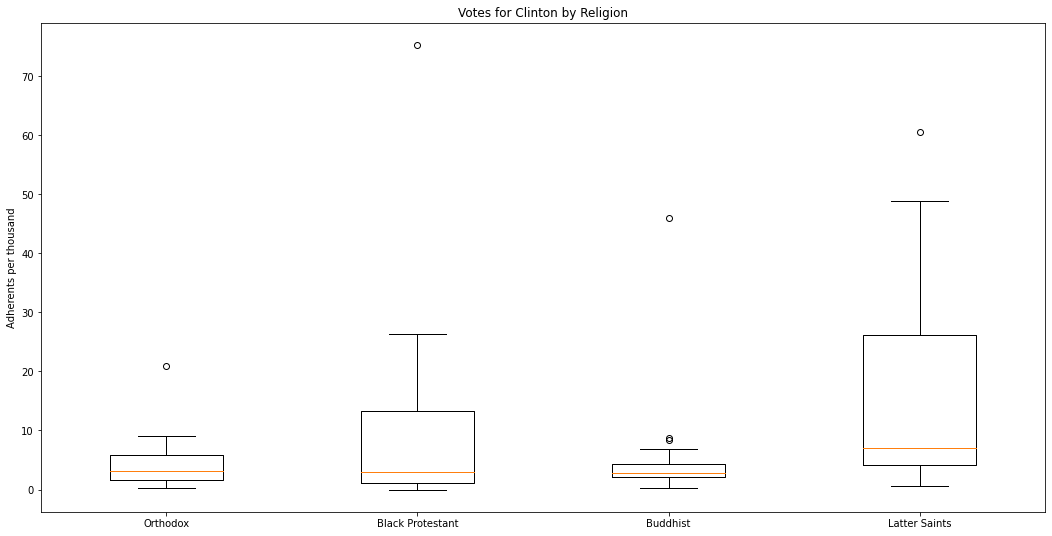

In [122]:
fig, ax = plt.subplots(figsize=(18,9))

ax.boxplot([clintonDf["Orthodox Adherents per thousand"], clintonDf["Black Protestant Adherents per thousand"],
            clintonDf["Total Buddhist Adherents per thousand"], clintonDf["Latter Day Saints Adherents per thousand"]])

ax.set_title("Votes for Clinton by Religion")
ax.set_xticklabels(["Orthodox", "Black Protestant", "Buddhist", "Latter Saints"])
ax.set_ylabel("Adherents per thousand")


plt.show()

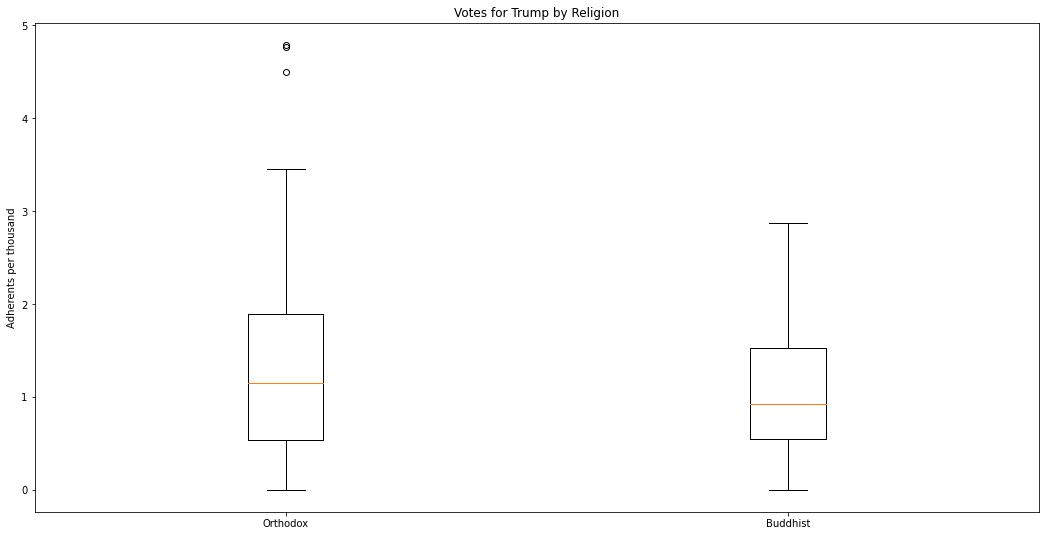

In [127]:
fig, ax = plt.subplots(figsize=(18,9))

ax.boxplot([trumpDf["Orthodox Adherents per thousand"],
            trumpDf["Total Buddhist Adherents per thousand"]])

ax.set_title("Votes for Trump by Religion")
ax.set_xticklabels(["Orthodox", "Buddhist"])
ax.set_ylabel("Adherents per thousand")


plt.show()

In [26]:
catholic_states_votes = groupedDf.sort_values('Catholic Adherents per thousand', ascending=False)[['Catholic Adherents per thousand', "Believers per Thousand", "Clinton", "Trump"]].head(5)
least_catholic_states_votes = groupedDf.sort_values('Catholic Adherents per thousand', ascending=True)[['Catholic Adherents per thousand', "Believers per Thousand", "Clinton", "Trump"]].head(6)[1:]

states_votes = groupedDf.sort_values('Catholic Adherents per thousand', ascending=True)[['Catholic Adherents per thousand', "Believers per Thousand", "Clinton", "Trump"]][1:]
catholic_states_votes

,Catholic Adherents per thousand,Believers per Thousand,Clinton,Trump
State Code,,,,
RI,441.729512,546.170683,249902,179421
MA,432.737178,551.637505,1964768,1083069
NJ,361.161566,536.895850,2021756,1535513
CT,349.312120,509.863582,884432,668266
NY,317.623984,501.294038,4143874,2640570


In [27]:
least_catholic_states_votes

,Catholic Adherents per thousand,Believers per Thousand,Clinton,Trump
State Code,,,,
TN,33.793166,533.664460,867110,1517402
SC,37.119604,492.927090,849469,1143611
MS,37.592073,582.460575,462001,678457
AR,41.186567,542.057226,378729,677904
AL,41.296124,618.968100,718084,1306925


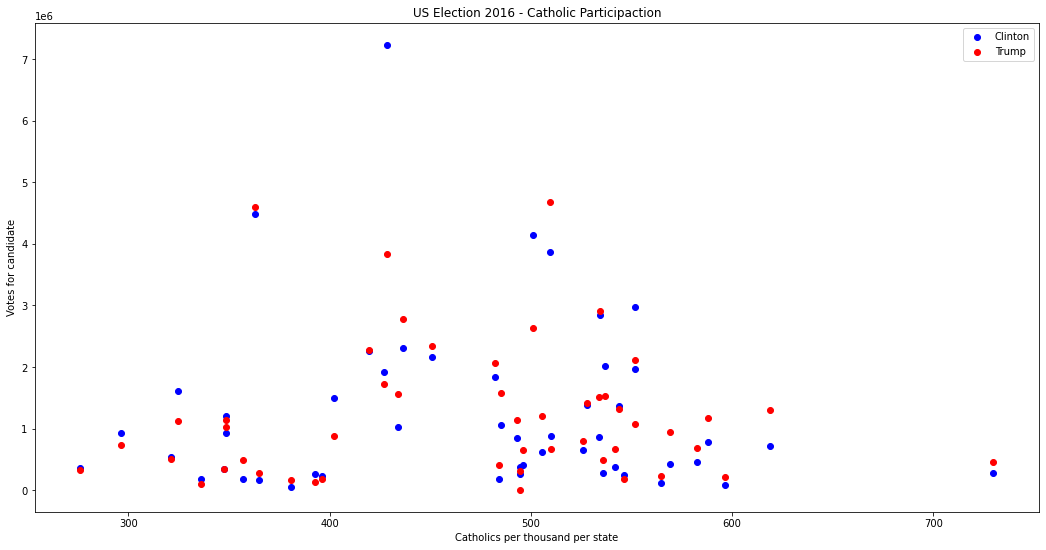

In [19]:
fig, ax = plt.subplots(figsize=(18,9))

ax.scatter(states_votes["Believers per Thousand"], states_votes["Clinton"], color="blue", label="Clinton")
ax.scatter(states_votes["Believers per Thousand"], states_votes["Trump"], color="red", label="Trump")

ax.legend()
ax.legend()

ax.set_title("US Election 2016 - Catholic Participaction")

ax.set_xlabel("Catholics per thousand per state")
ax.set_ylabel("Votes for candidate")

plt.show()

In [28]:
groupedDf["State Pop"].nlargest(5)

State Code
CA    39144818
TX    27469114
FL    20271272
NY    19795791
IL    12859995
Name: State Pop, dtype: int32

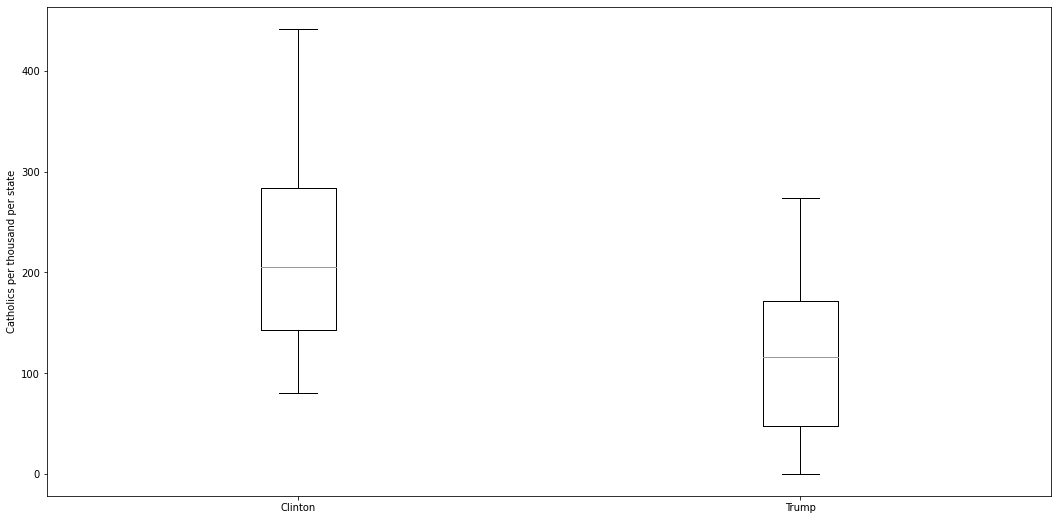

In [30]:
clintonDf = groupedDf[groupedDf["Winner 2016"]=="Clinton"]["Catholic Adherents per thousand"]
trumpDf = groupedDf[groupedDf["Winner 2016"]=="Trump"]['Catholic Adherents per thousand']

fig, ax = plt.subplots(figsize=(18,9))

ax.boxplot([clintonDf, trumpDf])

ax.set_xticklabels(["Clinton", "Trump"])
ax.set_ylabel("Catholics per thousand per state")

plt.show()

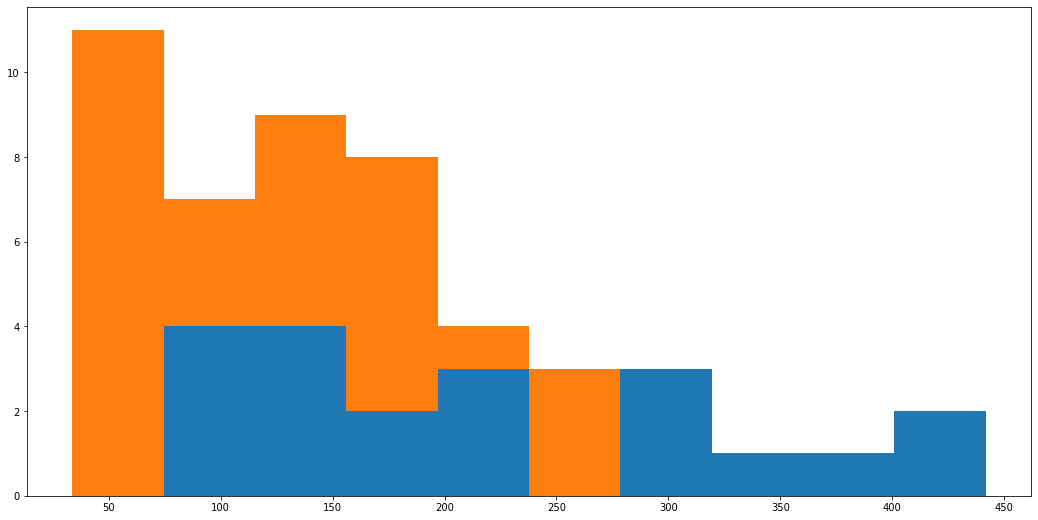

In [31]:

clinton_catholics = groupedDf[groupedDf["Winner 2016"]=="Clinton"]["Catholic Adherents per thousand"][1:]
trump_catholics = groupedDf[groupedDf["Winner 2016"]=="Trump"]["Catholic Adherents per thousand"][1:]

fig, ax = plt.subplots(figsize=(18,9))


ax.hist([clinton_catholics, trump_catholics], histtype='barstacked')


plt.show()

In [32]:
winnersDf = groupedDf.groupby("Winner 2016")[["Total Votes",  "Clinton", "Trump", "Total Adherents", "Total Unbelievers"]].sum()
winnersDf = winnersDf.T
winnersDf

Winner 2016,Clinton,Trump
Total Votes,54521766,75422903
Clinton,30574446,31816889
Trump,20931271,40194685
Total Adherents,63426719,86924409
Total Unbelievers,76620002,94433228


<ipython-input-252-2208834e823d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rList, rotation=45)


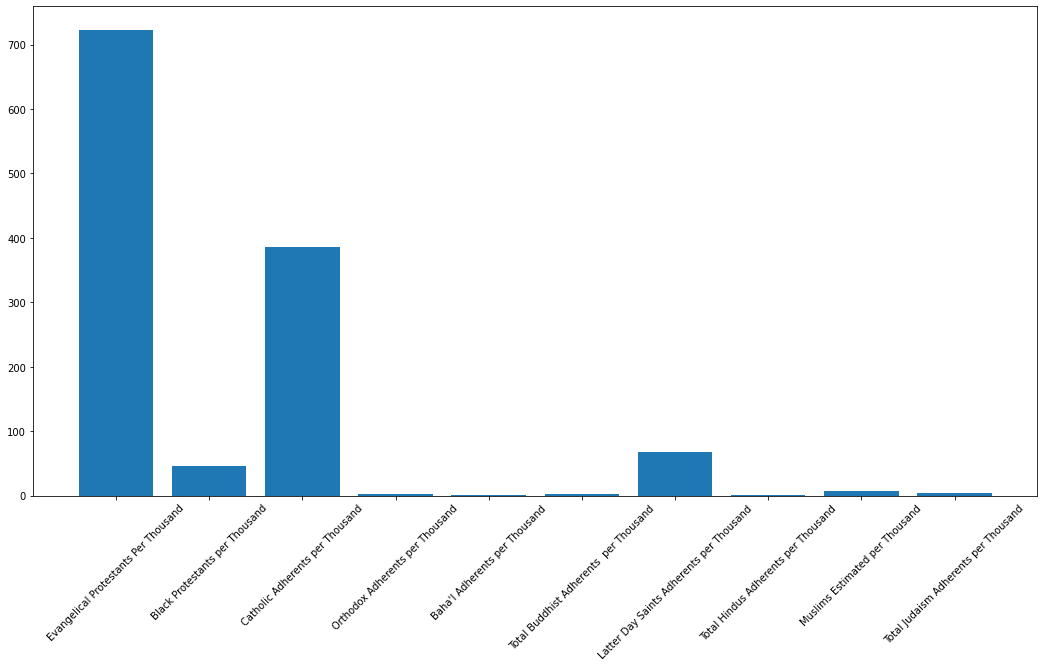

In [252]:
rList = ['Evangelical Protestants Per Thousand',
       'Black Protestants per Thousand',
       'Catholic Adherents per Thousand',
       'Orthodox Adherents per Thousand',
       'Baha\'I Adherents per Thousand',
       'Total Buddhist Adherents  per Thousand',
       'Latter Day Saints Adherents per Thousand',
       'Total Hindus Adherents per Thousand',
       'Muslims Estimated per Thousand',
       'Total Judaism Adherents per Thousand']



fig, ax = plt.subplots(figsize=(18,9))

ax.bar(rList, groupedDf[rList].sum(axis=0)/(1000))

ax.set_xticklabels(rList, rotation=45)

plt.show()

In [81]:
groupedDf.columns

Index(['State Pop', 'Clinton', 'Trump', 'Total Votes', 'Vote Difference',
       'Obama', 'Romney', '2012 Total Votes', 'Vote Difference O-R',
       'CBSA Population', 'POP2010', 'Total Congregations', 'Total Adherents',
       'Total Adherents per Thousand', 'Evangelical Protestant Adherents',
       'Evangelical Protestants Per Thousand', 'Black Protestant Adherents',
       'Black Protestants per Thousand', 'Catholic Adherents',
       'Catholic Adherents per Thousand', 'Orthodox Adherents',
       'Orthodox Adherents per Thousand', 'Baha'I Adherents',
       'Baha'I Adherents per Thousand', 'Total Buddhist Adherents',
       'Total Buddhist Adherents  per Thousand', 'Latter Day Saints Adherents',
       'Latter Day Saints Adherents per Thousand', 'Total Hindu Adherents',
       'Total Hindus Adherents per Thousand', 'Muslims Estimated',
       'Muslims Estimated per Thousand', 'Total Judaism Adherents',
       'Total Judaism Adherents per Thousand',
       'Unitarian Universalist 

<ipython-input-84-9ae4f961c879>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rList, rotation=45)


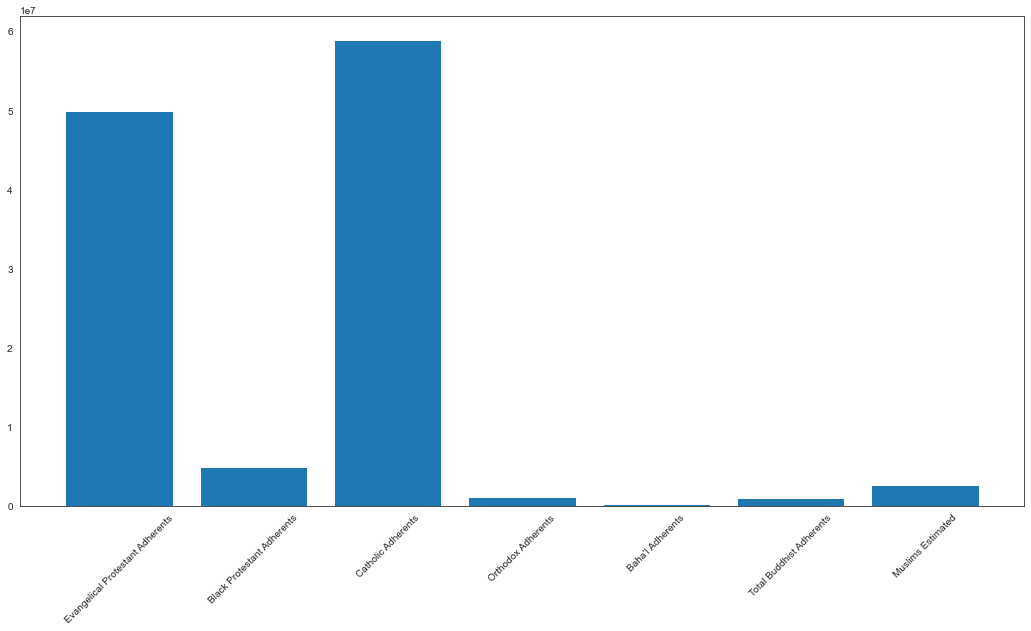

In [84]:
fig, ax = plt.subplots(figsize=(18,9))

rList = ['Evangelical Protestant Adherents', 'Black Protestant Adherents', 'Catholic Adherents', 'Orthodox Adherents', 'Baha\'I Adherents', 'Total Buddhist Adherents', 'Muslims Estimated']
ax.bar(rList, groupedDf[rList].sum(axis=0))

ax.set_xticklabels(rList, rotation=45)

plt.show()

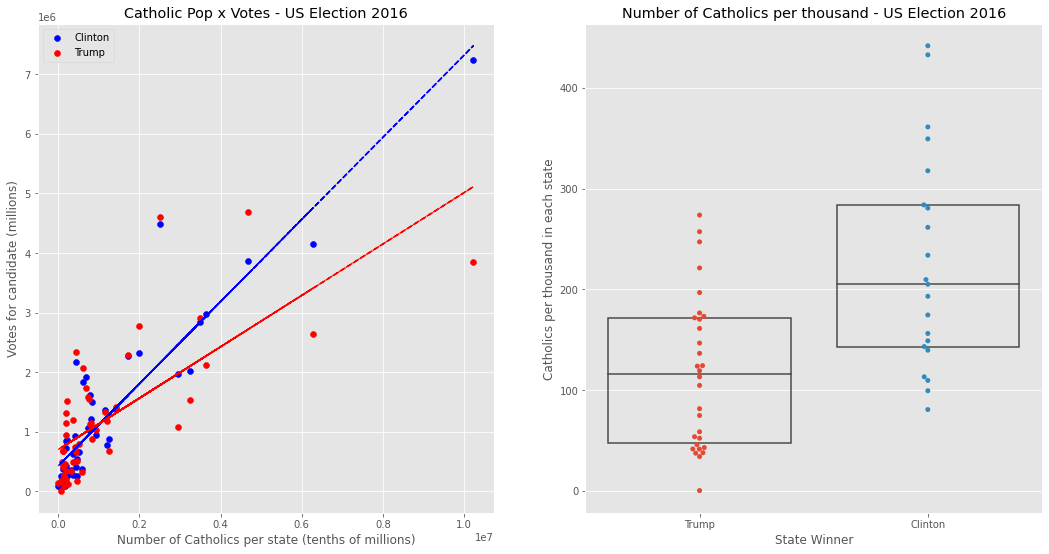

In [51]:
fig, ax = plt.subplots(1,2, figsize=(18,9)) # rows, columns

plt.style.use("ggplot")

ax[0].scatter(groupedDf["Catholic Adherents"], groupedDf["Clinton"], color="blue", label="Clinton")
ax[0].scatter(groupedDf["Catholic Adherents"], groupedDf["Trump"], color="red", label="Trump")

clinton_trend = np.polyfit(groupedDf["Catholic Adherents"], groupedDf["Clinton"], 1)
p = np.poly1d(clinton_trend)

ax[0].plot(groupedDf["Catholic Adherents"],p(groupedDf["Catholic Adherents"]),"r--", color="blue")

trump_trend = np.polyfit(groupedDf["Catholic Adherents"], groupedDf["Trump"], 1)
p = np.poly1d(trump_trend)

ax[0].plot(groupedDf["Catholic Adherents"],p(groupedDf["Catholic Adherents"]),"r--", color="red")

#clinton_catholics = groupedDf[groupedDf["Winner 2016"]=="Clinton"]["Catholic Adherents per thousand"][1:]
#trump_catholics = groupedDf[groupedDf["Winner 2016"]=="Trump"]["Catholic Adherents per thousand"][1:]

#clinton_catholics = groupedDf[groupedDf["Winner 2016"]=="Clinton"][["Catholic Adherents per thousand", "Winner 2016"]][1:]
#trump_catholics = groupedDf[groupedDf["Winner 2016"]=="Clinton"][["Catholic Adherents per thousand", "Winner 2016"]][1:]
#catholic_DF = pd.DataFrame({'Trump_votes':trump_catholics, 'Clinton_votes':clinton_catholics})

ax[0].legend()

ax[0].set_title("Catholic Pop x Votes - US Election 2016")
ax[0].set_xlabel("Number of Catholics per state (tenths of millions)")

ax[0].set_ylabel("Votes for candidate (millions)")

#ax[1].boxplot([clinton_catholics, trump_catholics])

sns.swarmplot(x="Winner 2016", y="Catholic Adherents per thousand", data=groupedDf)
sns.boxplot(x="Winner 2016", y="Catholic Adherents per thousand", data=groupedDf,
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})

#ax[1].set_xticklabels(["States Clinton Won", "States Trump Won"])
#ax[1].set_ylabel("Catholics per thousand per state")
ax[1].set_xlabel("State Winner")
ax[1].set_ylabel("Catholics per thousand in each state")

ax[1].set_title("Number of Catholics per thousand - US Election 2016")

plt.savefig("US2016_Elections_Catholic.png")
plt.show()

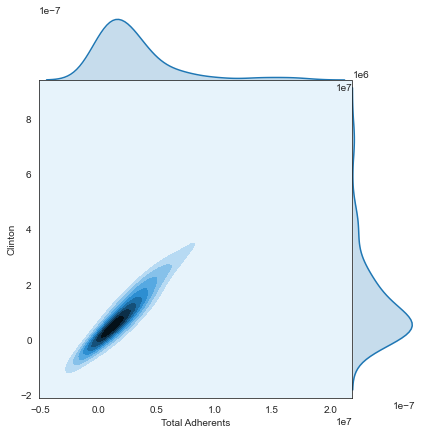

In [83]:
sns.set_style('white')
sns.jointplot(groupedDf["Total Adherents"], groupedDf["Clinton"], kind='kde', space=0)